# Titanic Data Analysis

### Sunny Jiang 09/07/2017

## What are the factors that affected the passenger survival rate?
I will explore the data and try to analyze the passenger survival rate factors like age, gender and P Class. 

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import operator

In [2]:
# load data
titanic_data = pd.read_csv('titanic-data.csv')
titanic = pd.DataFrame(titanic_data)

In [3]:
# preview of the data
len(titanic) ## 891

891

### 1. Age Range

First I want to find out which **age range** has the highest survival rate

In [4]:
# first find the maxmium age so I can set the range
titanic['Age'].max()

80.0

In [5]:
# out of total 891 passenger, 714 of them has age information
len(titanic[titanic['Age'] >= 0])

714

#### Note: 
Only 714 records returns age data. 177 (20%) are missing. Since this dataset is already a subset of all passengers on board Titanic. And the missing ratio is pretty larger. It won't make sense to impute with mean or median. I will just drop the missing value records for this analysis.

Populating the interactive namespace from numpy and matplotlib


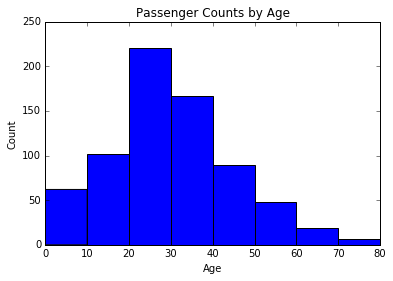

In [6]:
%pylab inline
# histogram by age range
titanic['Age'].plot.hist(bins= [0,10,20,30,40,50,60,70,80], range=(0,80))

plt.title('Passenger Counts by Age')
plt.xlabel('Age')
plt.ylabel('Count')

891
891


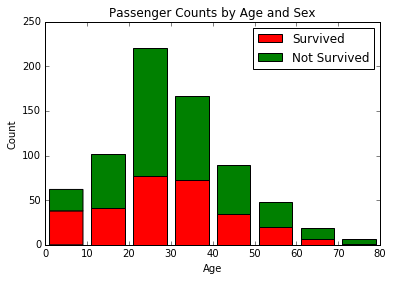

In [7]:
# splite data set to survived and not survived
t_survived = titanic[titanic['Survived'] == 1]
t_not_survived = titanic[titanic['Survived'] == 0]
print len(t_survived) + len(t_not_survived)
print len(titanic)


# add survived or not as a color to histogram
plt.hist([t_survived['Age'],t_not_survived['Age']],
          bins= [0,10,20,30,40,50,60,70,80], range=[0,80], stacked=True, color = ['r','g'])

plt.title('Passenger Counts by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Survived','Not Survived'])

From the chart we can only see the 0-10 age range's survival rate is more than 50% (red bar). However we couldn't see all the details for other ranges. So I'll put the information into a table and convert to percentage for easier comparison.

In [8]:
# group the passenger counts by age and whether survived
group_age = titanic.groupby(['Survived',pd.cut(titanic['Age'],bins= [0,10,20,30,40,50,60,70,80])])
group_age.size().unstack()

Age,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
Survived,,,,,,,,
0,26,71,146,86,53,25,13,4
1,38,44,84,69,33,17,4,1


In [9]:
# convert it to percentage table
group_age.size().unstack().apply(lambda x:x/x.sum())

Age,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
Survived,,,,,,,,
0,0.40625,0.617391,0.634783,0.554839,0.616279,0.595238,0.764706,0.8
1,0.59375,0.382609,0.365217,0.445161,0.383721,0.404762,0.235294,0.2


### 2. Gender
Now, how about put gender factor into the consideration?

In [10]:
# create female and male subset data
t_female = titanic[titanic['Sex'] == 'female']
t_male = titanic[titanic['Sex'] == 'male']
print len(t_female) + len(t_male)
print len(titanic)

891
891


Since the sum of female and male data equals total Titanic data 891. There is no missing data for Sex column.

In [11]:
# group the passenger counts by age and whether survived for female
group_female = t_female.groupby(['Survived',pd.cut(t_female['Age'],bins= [0,10,20,30,40,50,60,70,80])])
group_female.size().unstack()

Age,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Survived,,,,,,,
0,12.0,12.0,20.0,9.0,10.0,1.0,NaN
1,19.0,34.0,61.0,46.0,21.0,13.0,3.0


In [12]:
# convert it to percentage table
group_female.size().unstack().apply(lambda x:x/x.sum())

Age,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Survived,,,,,,,
0,0.387097,0.26087,0.246914,0.163636,0.322581,0.071429,NaN
1,0.612903,0.73913,0.753086,0.836364,0.677419,0.928571,1.0


In [13]:
# group the passenger counts by age and whether survived for male
group_male = t_male.groupby(['Survived',pd.cut(t_male['Age'],bins= [0,10,20,30,40,50,60,70,80])])
group_male.size().unstack()

Age,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
Survived,,,,,,,,
0,14,59,126,77,43,24,13,4
1,19,10,23,23,12,4,1,1


In [14]:
# convert it to percentage table
group_male.size().unstack().apply(lambda x:x/x.sum())

Age,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
Survived,,,,,,,,
0,0.424242,0.855072,0.845638,0.77,0.781818,0.857143,0.928571,0.8
1,0.575758,0.144928,0.154362,0.23,0.218182,0.142857,0.071429,0.2


### 3. Ticket Class
Next, we want to analyze whether **Ticket Class** affected the survival rate.

In [15]:
# group the passenger counts by P Class and whether survived
groups_pclass1 = titanic.groupby(['Survived','Pclass'])
groups_pclass1.size().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Since all numbers add to 891, the total length of the data set. There is no missing data for P Class column. 

In [16]:
# convert it to percentage table
groups_pclass1.size().unstack().apply(lambda x:x/x.sum())

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


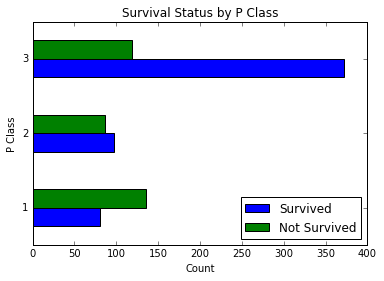

In [17]:
# histogram by P Class and color by survived or not
groups_pclass2 = titanic.groupby(['Pclass','Survived'])
groups_pclass2.size().unstack().plot.barh()

plt.title('Survival Status by P Class')
plt.xlabel('Count')
plt.ylabel('P Class')
plt.legend(('Survived','Not Survived'),loc='lower right')

#### Conclusion
1. **Age**: **The 0-10 age range has highest surival rate at 59%**. The next highest age range is 30-40 at 45%.
2. **Gender**: **The female survival rate across all age ranges are higher than 60%**. While for male, except for 0-10 age range, other ranges' survival rate are lower than 25%! This suggests that most men gave up their opportunity for life to children and women.
3. **P Class**: **The 1st class has the highest survival rate at 63%** while it drops to 47% and 24% for second and third class. This suggests the higher the ticket class the better chance passangers survived.

#### Limitations
1. Limited dataset: There were 2224 passengers and crew on board the Titanic. But we only have information for 891 passengaers. So the analysis may not represent the full picture of all the factors that affected the survival rate.
2. Missing Data: Even with the limited dataset, we are missing some information. For example, we only have age data for 714 out of 891 passengers. 

#### Other ideas for Further Analysis
1. For the passengers age between 0 to 10, whether the number of sibilings and parents affected their survival rate?
2. Is there any relatiionship between the P Class and embark location or Ticket Fare?

### Updates after review:

In [18]:
## create functions to simplify the code
def age_bin_table(data,variable):
    group_age = data.groupby([variable,pd.cut(data['Age'],bins= [0,10,20,30,40,50,60,70,80])])
    return group_age.size().unstack()

In [19]:
## instead of writing the groupby function for each one of them, now i can just call the function on selected data range
age_bin_table(titanic,'Survived')

Age,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
Survived,,,,,,,,
0,26,71,146,86,53,25,13,4
1,38,44,84,69,33,17,4,1


In [20]:
age_bin_table(titanic[titanic['Sex'] == 'female'],'Survived')

Age,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Survived,,,,,,,
0,12.0,12.0,20.0,9.0,10.0,1.0,NaN
1,19.0,34.0,61.0,46.0,21.0,13.0,3.0
